In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np
import tables
from sapphire.utils import pbar

In [3]:
FILENAME = 'Datastore/501_509_coinc.h5'

In [4]:
data = tables.open_file(FILENAME, 'r')

In [5]:
#from sapphire import ReconstructESDCoincidences
#rec = ReconstructESDCoincidences(data, overwrite=True)
#rec.reconstruct_and_store()

100%|#############################################################################################################################################################################|Time: 0:00:27
100%|#############################################################################################################################################################################|Time: 0:00:34


In [6]:
recs = data.root.coincidences.reconstructions.read()
theta = recs['zenith']
recs = recs.compress(~np.isnan(theta))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 338.,  802.,  792.,  544.,  225.,  108.,   35.,   40.,   62.,   50.]),
 array([ 0.01765693,  0.17225337,  0.3268498 ,  0.48144624,  0.63604267,
         0.79063911,  0.94523554,  1.09983198,  1.25442841,  1.40902485,
         1.56362128]),
 <a list of 1 Patch objects>)

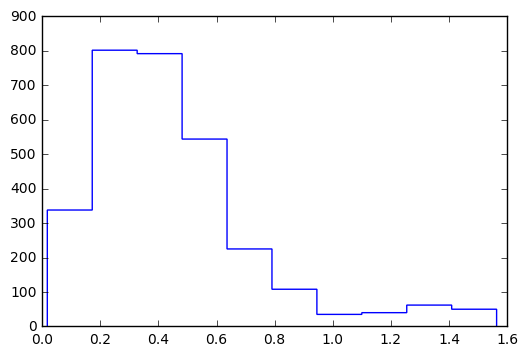

In [8]:
plt.hist(recs['zenith'], histtype='step')

In [9]:
from sapphire.transformations.celestial import zenithazimuth_to_equatorial

In [10]:
from sapphire import ScienceParkCluster

In [11]:
lla = ScienceParkCluster().get_lla_coordinates()

In [12]:
lat, lon, alt = lla
(lat, lon)

(52.355899099999995, 4.950988)

In [13]:
ra, dec = [], []
for rec in pbar(recs):
    #print(rec)
    ts = rec['ext_timestamp'] / 1.e9
    theta = rec['zenith']
    phi = rec['azimuth']
    r, d = zenithazimuth_to_equatorial(lat, lon, ts, theta, phi)
    ra.append(r-np.pi)
    dec.append(d)

100%|#############################################################################################################################################################################|Time: 0:00:00


In [14]:
#ra[0:10], dec[0:10]

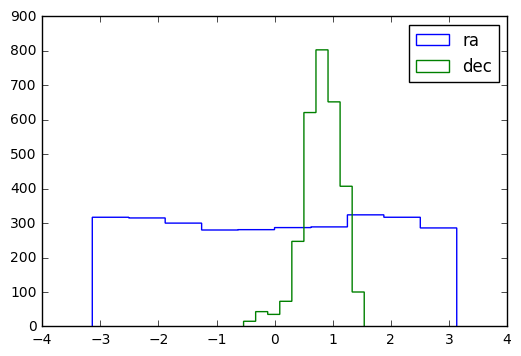

In [14]:
plt.hist(ra, histtype='step')
plt.hist(dec, histtype='step')
plt.legend(['ra', 'dec'])

/data/hisparc/env/miniconda/envs/py3/lib/python3.5/site-packages/matplotlib/projections/geo.py:493: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


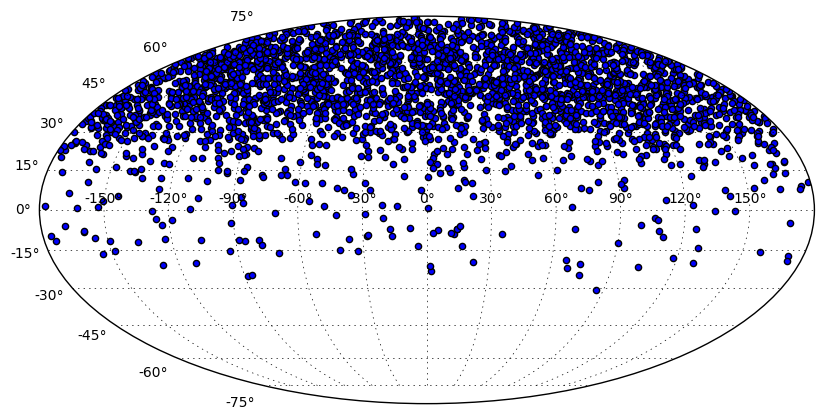

In [15]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)
ax.scatter(ra, dec)